In [2]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Checkpoint 1: Data Cleaning 1

In [3]:
companies = pd.read_csv('companies.csv',encoding='ISO-8859-1')
companies['permalink']=companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies['name']=companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')

rounds2 = pd.read_csv('rounds2.csv', encoding= 'ISO-8859-1')
rounds2['company_permalink']=rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: str(x.lower()))

companies['permalink'] = companies['permalink'].apply(lambda x: str(x.lower()))
companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')
companies.name = companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')
companies #this file consists of the basic informations of the companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/organization/eron,ERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [4]:
companies=companies.drop(['region','founded_at', 'city', 'homepage_url', 'state_code', 'status'], axis=1, )

In [5]:
rounds2 #this file consists investment information of all the companies

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


#### How many unique companies are present in rounds2?

In [6]:
set_1= set(rounds2.company_permalink) #len(rounds2.company_permalink.unique())
len(set_1)

66368

#### How many unique companies are present in companies?

In [7]:
len(companies.permalink.value_counts())

66368

#### In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

In [8]:
companies.columns[0]

'permalink'

#### Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [9]:
#now convering the columns as sets to check the difference
set_1= set(rounds2['company_permalink'])
set_2= set(companies['permalink'])
set_1.difference(set_2)

set()

Ans: No. As per the output, i.e- empty set, which means there are no companies in rounds2 file which are not present in companies file.

#### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [10]:
companies.rename(columns={'permalink':'company_permalink'}, inplace=True)
master_frame = pd.merge(rounds2, companies, how='outer', on='company_permalink')
master_frame.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,Media,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA


In [11]:
master_frame = master_frame.drop(['funding_round_permalink','funding_round_code', 'funded_at'], axis=1)

In [12]:
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
raised_amount_usd     19990
name                      1
category_list          3410
country_code           8678
dtype: int64

In [13]:
#as learned in class, dropping null of variables containing significant null values
master_frame = master_frame[~(master_frame.raised_amount_usd.isnull() | master_frame.category_list.isnull() | master_frame.country_code.isnull())]

master_frame.isnull().sum()

company_permalink     0
funding_round_type    0
raised_amount_usd     0
name                  1
category_list         0
country_code          0
dtype: int64

In [14]:
master_frame.shape #1st checkpoint: data cleaning, complete!!

(88529, 6)

## Checkpoint 2: Funding Type Analysis

#### Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1

In [15]:
average_funding = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()
print('Average venture: ', round(average_funding.venture))
print('Average seed: ', round(average_funding.seed))
print('Average private_equity: ', round(average_funding.private_equity))
print('Average angel: ', round(average_funding.angel))

Average venture:  11724223.0
Average seed:  747794.0
Average private_equity:  73938486.0
Average angel:  971574.0


#### Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

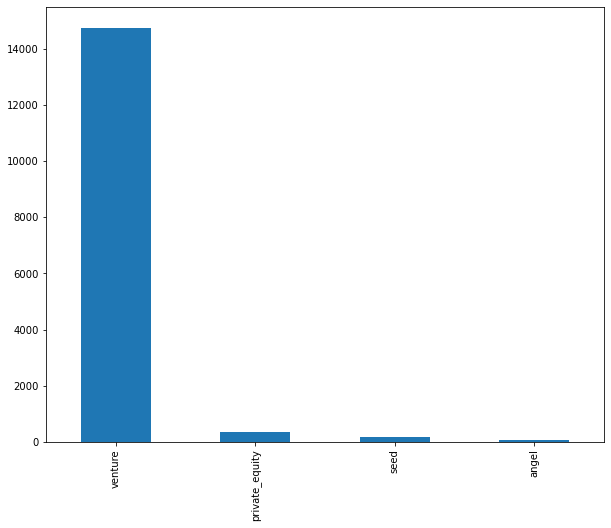

So the most suitable investment type for Spark Funds would be: 
 0    venture
dtype: object


In [16]:
#the 4 selected funding types are 'seed', 'venture', 'angel', 'private_equity' so altering dataframe to drop records of other funding types
seed = (master_frame.funding_round_type== 'seed') 
venture = (master_frame.funding_round_type== 'venture')
angel = (master_frame.funding_round_type== 'angel')
private_equity = (master_frame.funding_round_type== 'private_equity')
investment_range = master_frame['raised_amount_usd'].isin(np.arange(5000000, 15000000,1)) #records ranging from 5M-15M

mf = master_frame[( seed | venture | angel | private_equity )] #dataframe only consisting of the 4 selected funding types
mf_df= mf[investment_range]

plt.figure(figsize=(10,8))
mf_df.funding_round_type.value_counts().plot.bar()
plt.show()
print('So the most suitable investment type for Spark Funds would be: ''\n',mf_df.funding_round_type.mode())

In [17]:
mf_df.funding_round_type.value_counts()

venture           14741
private_equity      375
seed                184
angel                67
Name: funding_round_type, dtype: int64

In [18]:
mf_df.describe()

,raised_amount_usd
count,1.536700e+04
mean,8.444282e+06
std,2.691635e+06
min,5.000000e+06
25%,6.000000e+06
50%,8.000000e+06
75%,1.000000e+07
max,1.500000e+07


## Checkpoint 3: Country Analysis

In [19]:
#note: mf_df is with the 4 chosen funding round type along with range of raised amount usd 5M to 15M
#mf is without the range
venture_df = mf[(mf.funding_round_type== 'venture')]

#### based on the total investment amount each country has received, top 9 english speaking countries are:

In [20]:
top9 = venture_df.groupby('country_code').sum().sort_values('raised_amount_usd', ascending= False).head(11)
top9.rename(columns={'raised_amount_usd': 'Total Investment raised'})


,Total Investment raised
country_code,
USA,4.200680e+11
CHN,3.933892e+10
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
FRA,7.226851e+09
ISR,6.854350e+09
DEU,6.306922e+09
JPN,3.167647e+09


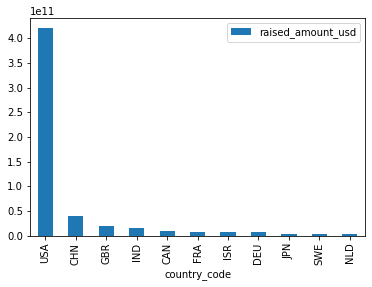

In [21]:
top9.plot.bar()
plt.show()

So top 3 English speaking countries are USA, United Kingdom, India

## Checkpoint 4: Sector Analysis 1

#### Extract the primary sector of each category list from the category_list column

In [22]:
#Extract the primary sector of each category list from the category_list column
# As instructed,the first string before the vertical bar will be considered the primary sector
mf['primary_sector'] = mf['category_list'].map(lambda x: x.split('|')[0])

#### Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [23]:
mapping = pd.read_csv('mapping.csv')
mapping.category_list.unique()
#check every word which was supposed to have alphabets 'na' in the word, has '0' instead;
#e.g- 'jour0lism' instead of 'journalism' or 'IT Ma0gement' instead of 'IT Management'

array([nan, '3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alter0tive Medicine', 'Alumni',
       'A0lytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'B

In [24]:
mapping['category_list'] = mapping['category_list'].replace({'0': 'na'}, regex=True)

#mapping['category_list'].unique() #all '0s' in between words replaced to 'na'
#dropping null value from category_list which drops the blank column as well
mapping1 = mapping[~(mapping.category_list.isnull())] #this null value refers to column named 'Blanks' which is futile for analysis
mapping1 = mapping1.drop('Blanks', axis=1) 
mapping1.reset_index(inplace=True)
mapping
#mapping['category_list'].unique()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [24]:
#finally mapping each primary sectors to their respective main sectors
mapping2 =pd.melt(mapping1, id_vars= 'category_list', value_vars= ['Manufacturing', 'Automotive & Sports', 'Cleantech / Semiconductors',
       'Entertainment', 'Health','News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'], var_name = 'Main_Sector')

mapping2 = mapping2[~(mapping2.value==0)] #lets only keep main sector with value 1
mapping2 = mapping2.drop('value', axis=1) #now lets drop the column 'value'

mapping2

,category_list,Main_Sector
0,3D,Manufacturing
1,3D Printing,Manufacturing
2,3D Technology,Manufacturing
6,Advanced Materials,Manufacturing
14,Agriculture,Manufacturing
...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising"
5426,Social Television,"Social, Finance, Analytics, Advertising"
5427,Social Travel,"Social, Finance, Analytics, Advertising"
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [25]:
#merging with mf on category_list
final_master_frame= pd.merge(mf, mapping2, how= 'left', on= 'category_list')
final_master_frame.head(5)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,Main_Sector
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,Media,Entertainment
1,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA,Application Platforms,NaN
2,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN,Curated Web,"News, Search and Messaging"
3,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN,Biotechnology,Cleantech / Semiconductors
4,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN,Biotechnology,Cleantech / Semiconductors


In [26]:
final_master_frame = final_master_frame[~(final_master_frame.Main_Sector.isnull())] #dropping null values of Main Sector column

#Now since Spark Funds is interested in top three english speaking countries, let us alter the dataset to keep records concerning to only the top three english speaking countries only.
final_master_frame = final_master_frame[(final_master_frame.country_code== 'USA') | (final_master_frame.country_code== 'GBR') | (final_master_frame.country_code== 'IND')]

final_master_frame= final_master_frame[final_master_frame.funding_round_type == 'venture']
final_master_frame.shape #df consisting records of chosen 3 countries and chosen funding round type but not raised amout range 5m-15m

(21093, 8)

In [27]:
#One last recheck on null values
final_master_frame.isnull().sum() #we are good to move on to our final steps

company_permalink     0
funding_round_type    0
raised_amount_usd     0
name                  0
category_list         0
country_code          0
primary_sector        0
Main_Sector           0
dtype: int64

### Checkpoint 5: Sector Analysis 2

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

1) All the columns of the master_frame along with the primary sector and the main sector

2) The total number (or count) of investments for each main sector in a separate column

3) The total amount invested in each main sector in a separate column

In [28]:
#creating 3 different dataframes from the final_master_frame based on selected countries and investment range
d1 = final_master_frame[((final_master_frame.country_code== 'USA') & (final_master_frame.raised_amount_usd.isin(np.arange(5000000,15000000,1))))]
d2 = final_master_frame[((final_master_frame.country_code== 'GBR') & (final_master_frame.raised_amount_usd.isin(np.arange(5000000,15000000,1))))]
d3 = final_master_frame[((final_master_frame.country_code== 'IND') & (final_master_frame.raised_amount_usd.isin(np.arange(5000000,15000000,1))))]


# USA

In [29]:
d1_group = d1.groupby('Main_Sector')['raised_amount_usd'].agg(['sum', 'count'])
USA = pd.merge(d1, d1_group, on= 'Main_Sector', how='left')
USA.rename(columns={'sum': 'total_investment_amount', 'count': 'total_investment_count'})

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,Main_Sector,total_investment_amount,total_investment_count
0,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising",4.124591e+09,502
1,/organization/1366-technologies,venture,5000000.0,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing,3.383865e+09,386
2,/organization/1366-technologies,venture,5150000.0,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing,3.383865e+09,386
3,/organization/1366-technologies,venture,12400000.0,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing,3.383865e+09,386
4,/organization/1366-technologies,venture,6000000.0,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing,3.383865e+09,386
...,...,...,...,...,...,...,...,...,...,...
5752,/organization/zygo-corporation,venture,9000000.0,Zygo Corporation,Manufacturing,USA,Manufacturing,Manufacturing,3.383865e+09,386
5753,/organization/zynerba-pharmaceuticals,venture,13000000.0,Zynerba Pharmaceuticals,Pharmaceuticals,USA,Pharmaceuticals,Health,4.805750e+09,561
5754,/organization/zyomyx-inc,venture,12000000.0,ZYOMYX,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors,1.421599e+10,1622
5755,/organization/zyomyx-inc,venture,14219999.0,ZYOMYX,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors,1.421599e+10,1622


# GBR

In [30]:
d2_group = d2.groupby('Main_Sector')['raised_amount_usd'].agg(['sum', 'count'])
GBR = pd.merge(d2, d2_group, on= 'Main_Sector', how='left')
GBR.rename(columns={'sum': 'total_investment_amount', 'count': 'total_investment_count'})

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,Main_Sector,total_investment_amount,total_investment_count
0,/organization/abcodia,venture,8259067.0,Abcodia,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors,927829246.0,106
1,/organization/acacia-pharma,venture,10000000.0,Acacia Pharma,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors,927829246.0,106
2,/organization/acal-energy,venture,9910333.0,ACAL Energy,Clean Technology,GBR,Clean Technology,Cleantech / Semiconductors,927829246.0,106
3,/organization/acal-enterprise-solutions,venture,10720178.0,Acal Enterprise Solutions,Information Technology,GBR,Information Technology,"Social, Finance, Analytics, Advertising",205607606.0,24
4,/organization/acs-clothing,venture,13359377.0,ACS Clothing,E-Commerce,GBR,E-Commerce,Others,841205523.0,100
...,...,...,...,...,...,...,...,...,...,...
329,/organization/zeus,venture,5100000.0,Zeus,Software,GBR,Software,Others,841205523.0,100
330,/organization/ziarco-pharma,venture,6000000.0,Ziarco Pharma,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors,927829246.0,106
331,/organization/zinwave,venture,9961962.0,Zinwave,Mobile,GBR,Mobile,"News, Search and Messaging",274140008.0,31
332,/organization/zinwave,venture,7640000.0,Zinwave,Mobile,GBR,Mobile,"News, Search and Messaging",274140008.0,31


# IND

In [31]:
d3_group = d3.groupby('Main_Sector')['raised_amount_usd'].agg(['sum', 'count'])
IND = pd.merge(d3, d3_group, on= 'Main_Sector', how='left')
IND.rename(columns={'sum': 'total_investment_amount', 'count': 'total_investment_count'})

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,Main_Sector,total_investment_amount,total_investment_count
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,Media,Entertainment,126150000.0,17
1,/organization/21diamonds-india,venture,6369507.0,21Diamonds,E-Commerce,IND,E-Commerce,Others,570169507.0,67
2,/organization/a-little-world,venture,6410000.0,A LITTLE WORLD,Finance,IND,Finance,"Social, Finance, Analytics, Advertising",168606050.0,21
3,/organization/amagi-media-labs,venture,5500000.0,Amagi Media Labs,Advertising,IND,Advertising,"Social, Finance, Analytics, Advertising",168606050.0,21
4,/organization/ameyo,venture,5000000.0,Ameyo,Software,IND,Software,Others,570169507.0,67
...,...,...,...,...,...,...,...,...,...,...
168,/organization/via-3,venture,5000000.0,Via,Travel,IND,Travel,Entertainment,126150000.0,17
169,/organization/vriti-infocom,venture,5000000.0,Vriti Infocom,Education,IND,Education,Others,570169507.0,67
170,/organization/yatra-online,venture,14500000.0,Yatra,Travel,IND,Travel,Entertainment,126150000.0,17
171,/organization/yatra-online,venture,5000000.0,Yatra,Travel,IND,Travel,Entertainment,126150000.0,17


In [32]:
#df consisting records of chosen 3 countries, raised amount range of 5m-15m and chosen funding round type
Master_Frame_Analysis= final_master_frame[final_master_frame.raised_amount_usd.isin(np.arange(5000000,15000000,1))]

### Total number of Investments (count)

In [33]:
Master_Frame_Analysis.groupby('country_code').count().sort_values('Main_Sector',ascending=False)

#print(d1.raised_amount_usd.count())
#print(d2.raised_amount_usd.count())
#print(d3.raised_amount_usd.count())

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,primary_sector,Main_Sector
country_code,,,,,,,
USA,5757,5757,5757,5757,5757,5757,5757
GBR,334,334,334,334,334,334,334
IND,173,173,173,173,173,173,173


### Total amount of investment (USD)

In [34]:
Master_Frame_Analysis.groupby('country_code').sum().sort_values('raised_amount_usd',ascending=False)


,raised_amount_usd
country_code,
USA,4.919588e+10
GBR,2.892928e+09
IND,1.434864e+09


### USA - Top Sector name (no. of investment-wise)

In [35]:
USA.groupby('Main_Sector').count().sort_values('company_permalink',ascending=False).head(3)


,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,sum,count
Main_Sector,,,,,,,,,
Others,1947,1947,1947,1947,1947,1947,1947,1947,1947
Cleantech / Semiconductors,1622,1622,1622,1622,1622,1622,1622,1622,1622
Health,561,561,561,561,561,561,561,561,561


### GBR - Top Sector name (no. of investment-wise)

In [36]:
GBR.groupby('Main_Sector').count().sort_values('company_permalink',ascending=False).head(3)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,sum,count
Main_Sector,,,,,,,,,
Cleantech / Semiconductors,106,106,106,106,106,106,106,106,106
Others,100,100,100,100,100,100,100,100,100
"News, Search and Messaging",31,31,31,31,31,31,31,31,31


### IND - Top Sector name (no. of investment-wise)

In [37]:
IND.groupby('Main_Sector').count().sort_values('company_permalink',ascending=False).head(3)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,sum,count
Main_Sector,,,,,,,,,
Others,67,67,67,67,67,67,67,67,67
"News, Search and Messaging",30,30,30,30,30,30,30,30,30
"Social, Finance, Analytics, Advertising",21,21,21,21,21,21,21,21,21


### For point 3 (top sector count-wise), which company received the highest investment?

In [38]:
#USA
USA.groupby('name')['count'].sum().sort_values(ascending=False)

name
Tigo Energy                  12976
Carbon Design Systems         9735
aPriori Technologies          9735
Integrien                     9735
Delivery Agent                9735
                             ...  
Movimento Group                 40
ISOPur Fluid Technologies       40
PGA TOUR Superstore             40
CarCharging                     40
Stio                            40
Name: count, Length: 4181, dtype: int64

In [39]:
#GBR
GBR.groupby('name')['count'].sum().sort_values(ascending=False)

name
Electric Cloud              400
EUSA Pharma                 318
SenSage                     300
OpenCloud                   300
Enigmatec                   300
                           ... 
Molecular Products Group     13
Smart Holograms              13
Streetcar                     3
Prodrive                      3
YASA Motors                   3
Name: count, Length: 276, dtype: int64

In [40]:
#IND
IND.groupby('name')['count'].sum().sort_values(ascending=False)

name
Myntra                      268
CommonFloor                 134
Pepperfry.com               134
iProf Learning Solutions    134
India Property Online       134
                           ... 
Bakers Circle                10
Power Mech Projects          10
Chai Point                   10
Mamagoto                     10
Tonbo Imaging                 1
Name: count, Length: 142, dtype: int64

## Checkpoint 6: Plots

A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [41]:
df = pd.merge(mf, mapping2, how= 'left', on= 'category_list')

In [42]:
df1 = pd.pivot_table(data=df, columns= 'funding_round_type', values='raised_amount_usd', index='Main_Sector', aggfunc= sum )

In [43]:
df1

funding_round_type,angel,private_equity,seed,venture
Main_Sector,,,,
Automotive & Sports,8013804.0,4.572906e+08,8.958653e+07,1.481262e+09
Cleantech / Semiconductors,49809935.0,1.861556e+10,5.404341e+08,1.062317e+11
Entertainment,127454791.0,4.858181e+09,4.075973e+08,1.150379e+10
Health,84578898.0,5.396069e+09,4.024210e+08,2.288842e+10
Manufacturing,86738236.0,2.249357e+09,2.949748e+08,1.676673e+10
"News, Search and Messaging",257255323.0,4.567181e+09,7.102430e+08,1.987803e+10
Others,414196179.0,2.216818e+10,1.580232e+09,7.253924e+10
"Social, Finance, Analytics, Advertising",245589024.0,5.618999e+09,7.097455e+08,2.195652e+10


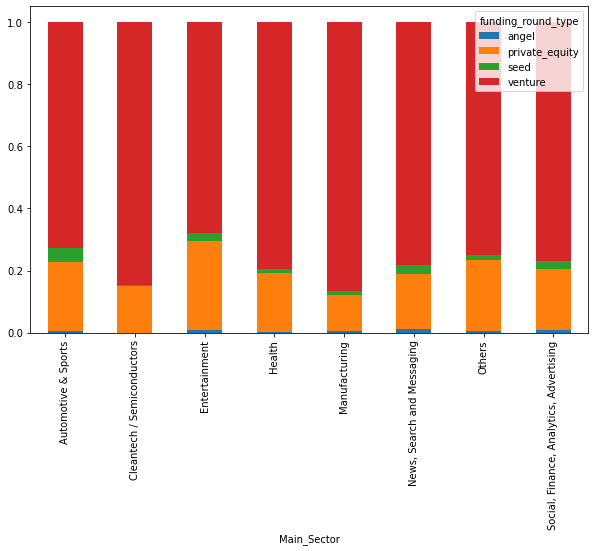

In [44]:
##Plot the stacked bar chart.
df2 = df1[["angel","private_equity","seed","venture"]].apply(lambda x: x/x.sum(), axis=1)
df2.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [45]:
df.groupby('country_code').sum().sort_values('raised_amount_usd', ascending=False).head(9)

,raised_amount_usd
country_code,
USA,5.084739e+11
CHN,6.100092e+10
GBR,2.689981e+10
IND,2.104911e+10
CAN,1.316891e+10
DEU,8.580103e+09
ISR,8.101823e+09
FRA,8.078614e+09
NLD,5.058484e+09


In [46]:
df3= df[df.country_code.isin(['USA', 'GBR', 'IND', 'CHN', 'CAN', 'DEU', 'ISR', 'FRA', 'NLD'])]
df4 = pd.pivot_table(data=df3, columns= 'funding_round_type', values='raised_amount_usd', index='country_code', aggfunc= sum )

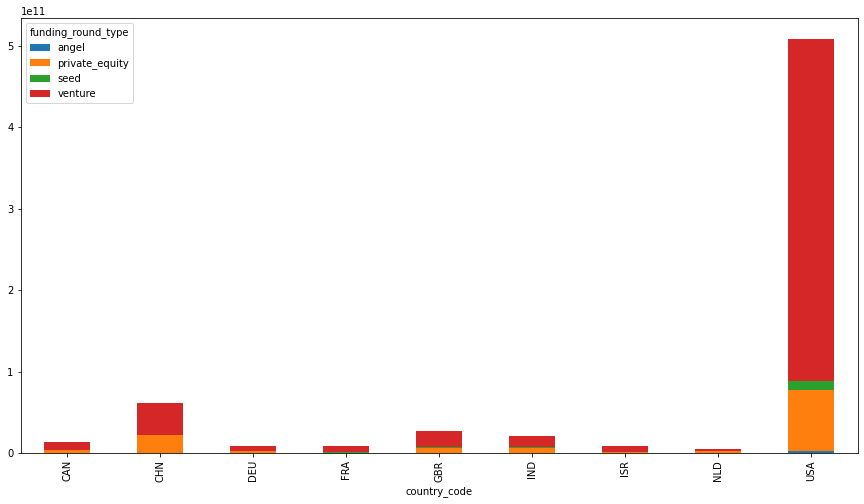

In [47]:
df4.plot(kind="bar", stacked="True", figsize=[15,8])
plt.show()

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

In [48]:
data = pd.DataFrame({'countries':['USA', 'GBR', 'IND'],
                     'others':[1947, 100, 67],
                     'CleanTech':[1622, 106, np.nan ],
                     'Health':[561, np.nan, np.nan],
                     'News':[np.nan, 31, 30],
                     'Social':[np.nan, np.nan, 21]
                    })

In [49]:
data = data.set_index('countries')
data

,others,CleanTech,Health,News,Social
countries,,,,,
USA,1947,1622.0,561.0,NaN,NaN
GBR,100,106.0,NaN,31.0,NaN
IND,67,NaN,NaN,30.0,21.0


In [25]:
data.plot(kind='bar')
plt.xlabel('Countries', fontsize=20)
plt.ylabel('Investment Count', fontsize=20)
plt.legend(bbox_to_anchor=(1,1), fontsize=10)
plt.show()

NameError: name 'data' is not defined

# Thank You